In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Splitting the Data

In [2]:
#Loading the dataset
housing = fetch_california_housing()

In [3]:
#Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

In [4]:
#Creating training and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [5]:
#Normalizing the training, validation and testing features using Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

# Creating Model using Keras's Functional API

In [6]:
#Creating a Functional Model 
input_ = keras.layers.Input(shape=X_train.shape[1:]) #Creating a basic Input layer for the Data
hidden1 = keras.layers.Dense(30, activation="relu")(input_) #Using ReLU for Dense First Hidden layer with 30 neurons 
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) #Using ReLU for Dense Second Hidden layer with 30 neurons
concat = keras.layers.Concatenate()([input_, hidden2]) #Joining the Input layer with Second Hidden layer for combined wide and deep path outputs
output = keras.layers.Dense(1)(concat) #Preparing output using the combined output
model = keras.Model(inputs=[input_], outputs=[output]) #Preparing model using the inputs and outputs obtained

In [7]:
#Viewing the summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

# Compiling the Model

In [8]:
#Compiling the prepared model
model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(learning_rate=0.001)
)

# Fitting Training Set on the Model

In [9]:
#Training model by fitting it on the training set
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 3.6376 - val_loss: 0.9012
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8233 - val_loss: 0.6617
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7092 - val_loss: 0.6153
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6779 - val_loss: 0.5772
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6066 - val_loss: 0.5465
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5836 - val_loss: 0.5230
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5837 - val_loss: 0.5024
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5459 - val_loss: 0.4902
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5282 - val_loss: 0.4768
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5282 - val_loss: 0.4695

In [10]:
#Viewing the parameters for the model
history.params

{'epochs': 20, 'steps': 363, 'verbose': 1}

## Plotting the Model

In [11]:
#Using pandas dataframe to create a dataframe of the losses and extra parameters
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,val_loss
0,2.339233,0.901173
1,0.773054,0.661657
2,0.691630,0.615340
3,0.650636,0.577222
4,0.616710,0.546496


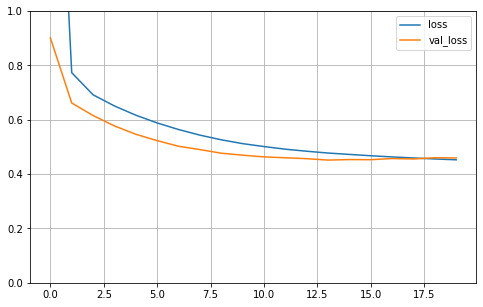

In [12]:
#Visualizing the learning curve for the model
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluating the Model

In [13]:
#Evaluating Model for the test set
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 870us/step - loss: 0.4407


0.4406959116458893

# Predicting Values from the Model

In [14]:
#Creating new instances from the test set
X_new = X_test[:3]
X_new

array([[-0.90217913,  0.24722035,  0.15408668,  0.39276576, -0.05389439,
        -0.06702963, -0.69714202,  1.77159944],
       [-0.38063691, -0.53746133, -0.09852481, -0.17034134,  0.09759847,
         0.10321906,  0.94261436, -0.7395803 ],
       [ 0.44358333, -1.32214301,  0.32160542, -0.06035882,  1.6022405 ,
         0.02988513, -1.09776432,  1.28234374]])

In [15]:
#Computing probabilities for the new set
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.62],
       [1.19],
       [1.84]], dtype=float32)

In [16]:
#Viewing the actual probabilities
y_new = y_test[:3]
y_new

array([0.577, 1.023, 2.541])